In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import mglearn

from sklearn.datasets import load_digits
digits = load_digits()

from sklearn.decomposition import PCA

Text(0, 0.5, 'Second principal component')

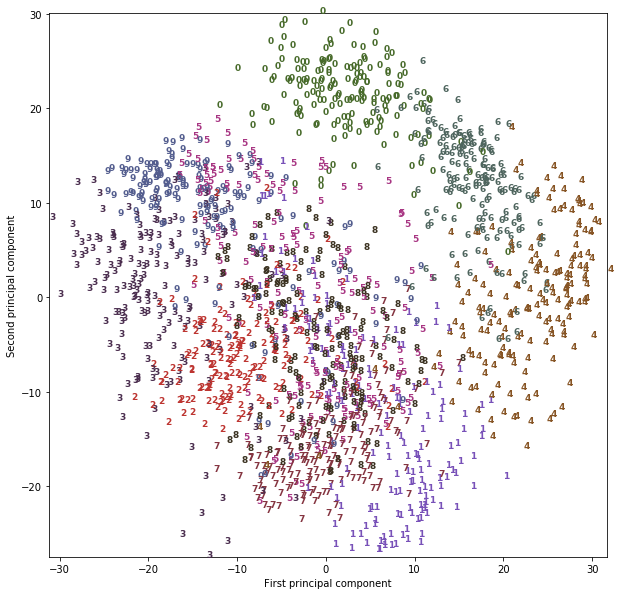

In [3]:
# build a PCA model
pca = PCA(n_components=2)
pca.fit(digits.data)
# transform the digits data onto the first two principal components
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max())
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [4]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
cancer = load_breast_cancer()

scaler = StandardScaler()
scaler.fit(cancer.data)
X_scaled_cancer = scaler.transform(cancer.data)
pca.fit(X_scaled_cancer)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Text(0, 0.5, 'Second principal component')

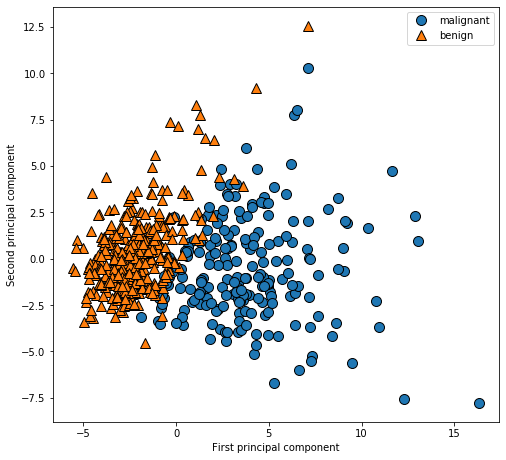

In [5]:
# transform data onto the first two principal components
X_pca = pca.transform(X_scaled_cancer)
# plot first vs. second principal component, colored by class
plt.figure(figsize=(8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], cancer.target)
plt.legend(cancer.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

In [6]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
# use fit_transform instead of fit, as TSNE has no transform method
digits_tsne = tsne.fit_transform(digits.data)

Text(0, 0.5, 't-SNE feature 1')

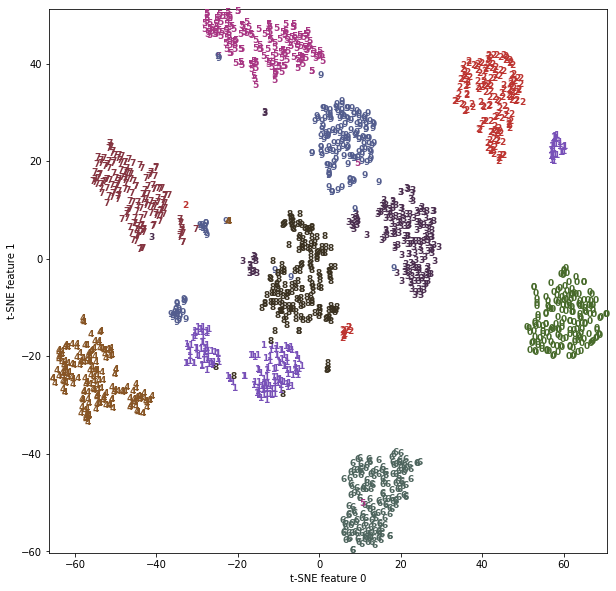

In [7]:
plt.figure(figsize=(10, 10))
plt.xlim(digits_tsne[:, 0].min(), digits_tsne[:, 0].max() + 1)
plt.ylim(digits_tsne[:, 1].min(), digits_tsne[:, 1].max() + 1)
for i in range(len(digits.data)):
    # actually plot the digits as text instead of using scatter
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]),
             color = colors[digits.target[i]],
             fontdict={'weight': 'bold', 'size': 9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")

In [8]:
cancer_tsne = tsne.fit_transform(X_scaled_cancer)

Text(0, 0.5, 'Second t-SNE component')

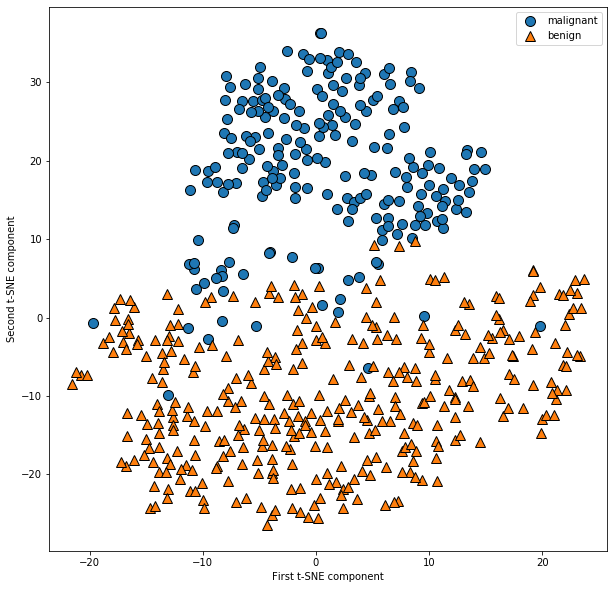

In [9]:
plt.figure(figsize=(10, 10))
plt.xlim(cancer_tsne[:, 0].min(), cancer_tsne[:, 0].max() + 1)
plt.ylim(cancer_tsne[:, 1].min(), cancer_tsne[:, 1].max() + 1)

mglearn.discrete_scatter(cancer_tsne[:, 0], cancer_tsne[:, 1], cancer.target)

plt.legend(cancer.target_names, loc="best")
plt.xlabel("First t-SNE component")
plt.ylabel("Second t-SNE component")